# Feature transformation or analysis

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
data = pd.read_csv('/content/fruits_data_ext.csv')
print(data.columns, data.head())

Index(['Unnamed: 0', 'fruit_label', 'fruit_name', 'fruit_subtype', 'mass',
       'width', 'height', 'color_score'],
      dtype='object')    Unnamed: 0  fruit_label fruit_name fruit_subtype   mass  width  height  \
0           0            1      apple  granny_smith  192.0    8.4     7.3   
1           1            1      apple  granny_smith  180.0    8.0     6.8   
2           2            1      apple  granny_smith  176.0    7.4     7.2   
3           3            2   mandarin      mandarin   86.0    6.2     4.7   
4           4            2   mandarin      mandarin   84.0    6.0     4.6   

   color_score  
0         0.55  
1         0.59  
2         0.60  
3         0.80  
4         0.79  


In [75]:
# The iris dataset
X, y = data.iloc[:, 5:7], data.iloc[:, 1]

# Add some noisy data to degrade features
random_features = np.random.RandomState(1000).uniform(0, 0.5, size=(X.shape[0], 22))
X = np.hstack((X, random_features))
print (X.shape, y.shape)

# Normalize data to 0-1
# X = MinMaxScaler().fit_transform(X)
X = StandardScaler().fit_transform(X)

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(177, 24) (177,)
(132, 24) (45, 24) (132,) (45,)


In [76]:
# Create and train classifier
clf = SVC(kernel = 'poly')

start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

print(f'Training time: {end_time - start_time}')

Training time: 0.005143642425537109


Accuracy: 0.18


<Axes: >

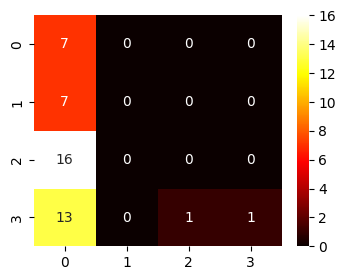

In [77]:
# Estimate predictions and compute some metrics

predictions = clf.predict(X_test)
acc_b = accuracy_score(y_test, predictions)
cm_b = confusion_matrix(y_test, predictions)

# Print results
print(f'Accuracy: {round(acc_b, 2)}')
_, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm_b, annot=True, cmap='hot', ax=ax)

### Principal Component Analysis (PCA) -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components = 4, random_state=1 ) #

# Create reduced versions of subset
trans_train = pca.fit_transform(X_train)
trans_test = pca.transform(X_test)

In [80]:
print(trans_train.shape, trans_test.shape)
print(pca.explained_variance_ratio_)

(132, 4) (45, 4)
[0.0803036  0.07087736 0.06749941 0.06284615]


(Text(0.5, 0, 'PCA-1'), Text(0, 0.5, 'PCA-2'))

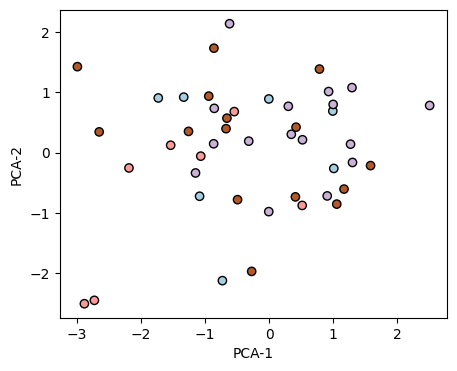

In [81]:
# Plot transformed points
_, ax = plt.subplots(figsize=(5,4))

ax.scatter(trans_test[:, 0], trans_test[:, 1], c=y_test, cmap='Paired', edgecolors='k')
ax.set_xlabel('PCA-1'), ax.set_ylabel('PCA-2')

In [82]:
# Classify PCA features and compute predictions
clf = SVC(kernel='poly')

start_time = time.time()
clf.fit(trans_train, y_train)
end_time = time.time()

print(f'Total time: {end_time-start_time}')

Total time: 0.004191875457763672


For PCA
Accuracy before: 0.178, - Now : 0.178 



(Text(0.5, 1.0, 'Before'), Text(0.5, 1.0, 'PCA'))

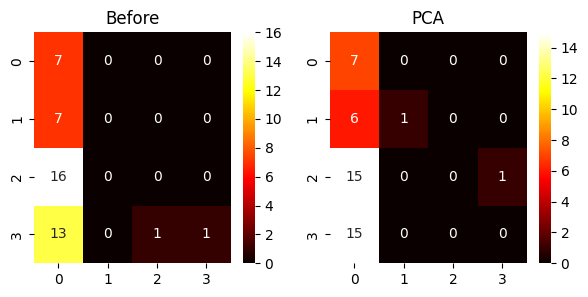

In [83]:
# Comput metrics
predictions = clf.predict(trans_test)
acc_trans = accuracy_score(y_test, predictions)
cm_trans = confusion_matrix(y_test, predictions)

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc_b , acc_trans ))
_, axes = plt.subplots(1, 2, figsize=(7,3))
sns.heatmap(cm_b, annot=True, cmap='hot', ax=axes[0])
sns.heatmap(cm_trans, annot=True, cmap='hot', ax=axes[1])
axes[0].set_title('Before'), axes[1].set_title('PCA')

### Kernel PCA -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)


In [84]:
from sklearn.decomposition import KernelPCA

In [85]:
kpca = KernelPCA(n_components = 4, kernel='rbf', random_state=1 )

# Create reduced versions of subset
trans_train = kpca.fit_transform(X_train)
trans_test = kpca.transform(X_test)

In [86]:
print(trans_train.shape, trans_test.shape)
print(kpca.eigenvalues_)

(132, 4) (45, 4)
[3.41057111 3.1573794  3.06695163 3.0195053 ]


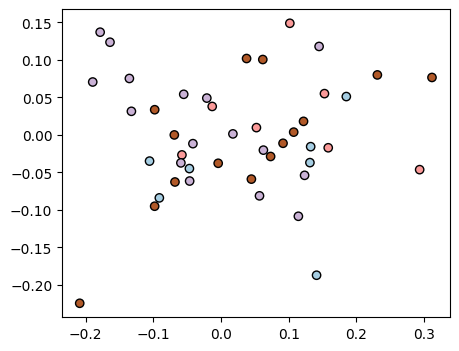

In [87]:
# Plot transformed points
_, ax = plt.subplots(figsize=(5,4))
ax.scatter(trans_test[:,0], trans_test[:, 1],c=y_test, cmap='Paired', edgecolors='k')

In [88]:
# Classify kernel PCA features and compute predictions
clf = SVC(kernel = 'poly')

start_time = time.time()
clf.fit(trans_train, y_train)
end_time = time.time()

print(f'Total time: {end_time-start_time}')

Total time: 0.006020784378051758


For Kernel PCA
Accuracy before: 0.178, - Now : 0.133 



(Text(0.5, 1.0, 'Before'), Text(0.5, 1.0, 'KPCA'))

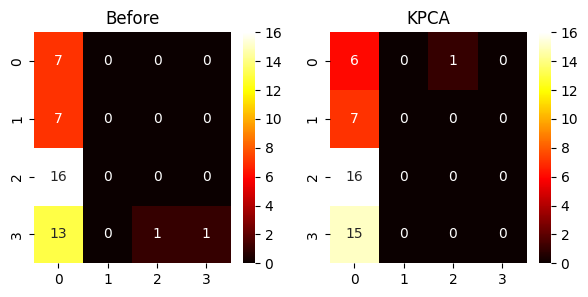

In [89]:
# Comput metrics
predictions = clf.predict(trans_test)
acc_trans = accuracy_score(y_test, predictions)
cm_trans = confusion_matrix(y_test, predictions)
# Compare against original model
print("For Kernel PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc_b , acc_trans ))

_, axes = plt.subplots(1, 2, figsize=(7,3))
sns.heatmap(cm_b, annot=True, cmap='hot', ax=axes[0])
sns.heatmap(cm_trans, annot=True, cmap='hot', ax=axes[1])
axes[0].set_title('Before'), axes[1].set_title('KPCA')